In [71]:
import numpy as np
from numpy import genfromtxt
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import csv
from scipy.io import loadmat
import math
%matplotlib inline

In [2]:
X = genfromtxt('mydata.csv', delimiter=',')

In [3]:
X.shape

(5101, 36)

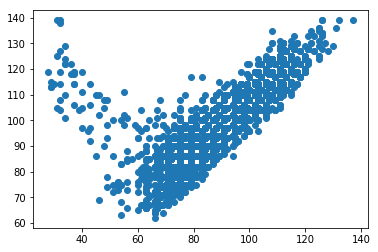

In [4]:
plt.scatter(X[:,1], X[:,2])
plt.show()
#fig, ax = plt.subplots(figsize=(200, 200))
#ax.scatter(X[:,0], X[:,1])

In [17]:
X[2,:]

array([  47.,   37.,  119.,  133.,   44.,   34.,  124.,  143.,   44.,
         34.,  129.,  143.,   57.,   49.,  115.,  113.,   47.,   31.,
        131.,  142.,   44.,   31.,  131.,  142.,   68.,   68.,  100.,
         85.,   50.,   39.,  118.,  132.,   43.,   29.,  133.,  143.])

In [24]:
def estimateGaussian(X):
    mu = X.mean(axis=0)
    sigma = X.var(axis=0)
    return mu, sigma

In [61]:
mus = np.zeros(shape=(1, X.shape[1]))
sigmas = np.zeros(shape=(1, X.shape[1]))

In [62]:
mus.shape
sigmas.shape

(1, 36)

In [67]:
for i in range(1, X.shape[1]):
    [mu, sigma] = estimateGaussian(X[i][:])
    mus[0][i - 1] = mu;
    sigmas[0][i - 1] = sigma;
    #print('mu -> {}'.format(mu))
    #print('sigma -> {}'.format(sigma))

In [166]:
mus

array([[ 85.63888889,  85.33333333,  85.        ,  59.91666667,
         85.25      ,  81.33333333,  59.27777778,  87.52777778,
         72.19444444,  77.80555556,  75.80555556,  67.19444444,
         71.86111111,  79.05555556,  72.44444444,  75.72222222,
         81.83333333,  80.27777778,  81.86111111,  71.55555556,
         87.97222222,  82.58333333,  78.86111111,  67.52777778,
         71.58333333,  69.02777778,  74.55555556,  88.75      ,
         78.69444444,  82.75      ,  72.38888889,  75.30555556,
         75.38888889,  79.11111111,  72.44444444,  85.63888889]])

In [165]:
sigmas

array([[ 2149.17515432,  1872.61111111,   410.5       ,    67.52083333,
         2278.6875    ,  1244.77777778,    93.97839506,  2507.63811728,
         1247.71219136,   213.48996914,  1272.26774691,    96.87885802,
          334.9529321 ,  1661.16358025,   122.02469136,    71.8117284 ,
         1793.36111111,  1797.42283951,   861.00848765,   213.63580247,
         2483.97145062,  1082.13194444,   200.34182099,   862.52700617,
          935.57638889,    83.30478395,  1234.08024691,  2720.52083333,
          640.6566358 ,  1500.29861111,   144.90432099,   828.32330247,
          444.84876543,  1575.7654321 ,   119.63580247,  2149.17515432]])

In [169]:
sigmas.shape

(1, 36)

In [171]:
X.shape

(5101, 36)

In [190]:
mus.shape

(1, 36)

In [191]:
X.shape

(5101, 36)

In [194]:
def mvGaussian(X, mus, sigmas):
    tmp1 = np.exp( -((X - mus) ** 2)/(2 * sigmas) )
    tmp2 = ( 1 / ( np.sqrt((2 * math.pi)) * np.sqrt(sigmas) ) )  
    tmp2 = 1 / (np.sqrt((2 * math.pi)) * np.sqrt(sigmas))
    tmp3 = np.dot(tmp1 , np.transpose(tmp2))
    print('tmp1 => {}'.format(tmp1))
    print('tmp1.shape -> {}'.format(tmp1.shape))
    print('tmp2 => {}'.format(tmp2))
    print('tmp2.shape -> {}'.format(tmp2.shape))
    print('tmp3 => {}'.format(tmp3))
    print('tmp3.shape -> {}'.format(tmp3.shape))
    return tmp3

In [173]:
mus.shape

(1, 36)

In [174]:
np.transpose(mus[:]).shape

(36, 1)

In [175]:
X.shape

(5101, 36)

In [195]:
pval = mvGaussian(X, mus, sigmas)

tmp1 => [[             nan              nan              nan ...,              nan
               nan              nan]
 [  6.93818247e-01   5.77683724e-01   2.44622524e-01 ...,   4.79763601e-01
    5.97828248e-07   4.77580827e-01]
 [  7.06569208e-01   5.35926810e-01   2.44622524e-01 ...,   4.50771456e-01
    2.20895390e-07   4.65111071e-01]
 ..., 
 [  9.30173941e-01   9.71892188e-01   5.25010942e-01 ...,   8.70702301e-01
    1.55825814e-02   9.99905043e-01]
 [  9.51366740e-01   9.99258589e-01   5.25010942e-01 ...,   9.56141038e-01
    1.55825814e-02   9.99905043e-01]
 [  9.51366740e-01   9.91462764e-01   7.60289476e-01 ...,   9.56141038e-01
    4.18603055e-02   9.95006104e-01]]
tmp1.shape -> (5101, 36)
tmp2 => [[ 0.00860546  0.00921905  0.01969035  0.04855022  0.00835733  0.01130744
   0.04115248  0.00796668  0.01129413  0.02730369  0.01118461  0.04053177
   0.02179808  0.00978822  0.03611488  0.04707739  0.00942055  0.0094099
   0.01359585  0.02729437  0.00800455  0.01212746  0.02818

In [196]:
pval

array([[        nan],
       [ 0.13868525],
       [ 0.19310668],
       ..., 
       [ 0.34229283],
       [ 0.35828711],
       [ 0.36596322]])

In [198]:
pval.shape

(5101, 1)

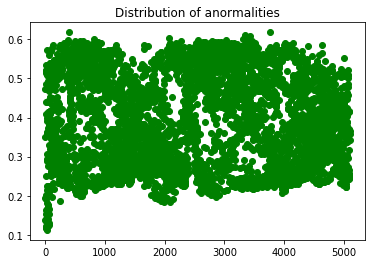

In [347]:
plt.plot(pval, 'go')
plt.title("Distribution of anormalities")
plt.xlabel("")

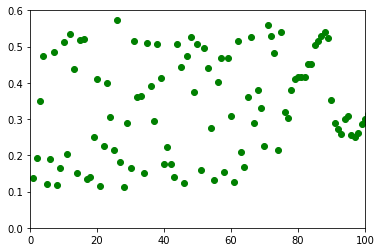

In [346]:
plt.plot(pval, 'go')
plt.axis([0, 100, 0, 0.6])
plt.show()

In [281]:
epsilon = 0.20

In [282]:
outliers = np.zeros(shape=(2, X.shape[0]))

In [283]:
outliers.shape

(2, 5101)

In [286]:
for i in range(0, len(pval)):
    if pval[i] < epsilon:
        outliers[1][i] = int(1)
    else:
        outliers[1][i] = int(0)
    outliers[0][i] = pval[i]

In [287]:
outliers

array([[        nan,  0.13868525,  0.19310668, ...,  0.34229283,
         0.35828711,  0.36596322],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [271]:
X.shape

(5101, 36)

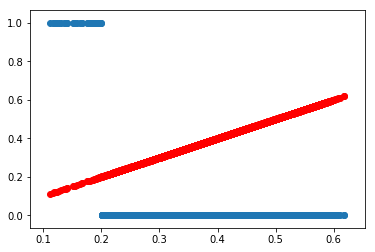

In [321]:
plt.scatter(pval[:], outliers[1][:])
plt.scatter(pval[:], outliers[0][:], color='red')